In [2]:

import numpy as np
import pandas as pd
import h5py
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
with h5py.File("data/full_dataset_vectors.h5", "r") as data:    
    # Split the data into training/test features/targets
    x_train = data["X_train"][:]
    y_train = data["y_train"][:]
    x_test = data["X_test"][:] 
    y_test = data["y_test"][:]


In [5]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)


c:\Users\richg\miniconda3\envs\hello\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
#eval the model
y_pred=log_reg.predict(x_test)
print("Accuracy: ", log_reg.score(x_test,y_test))

Accuracy:  0.57


In [7]:

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.668     0.782     0.721       170
           1      0.905     0.909     0.907       252
           2      0.522     0.466     0.492       232
           3      0.543     0.467     0.503       214
           4      0.571     0.514     0.541       220
           5      0.461     0.443     0.452       174
           6      0.506     0.523     0.514       174
           7      0.527     0.535     0.531       198
           8      0.433     0.511     0.469       178
           9      0.458     0.489     0.473       188

    accuracy                          0.570      2000
   macro avg      0.559     0.564     0.560      2000
weighted avg      0.570     0.570     0.569      2000



<AxesSubplot:>

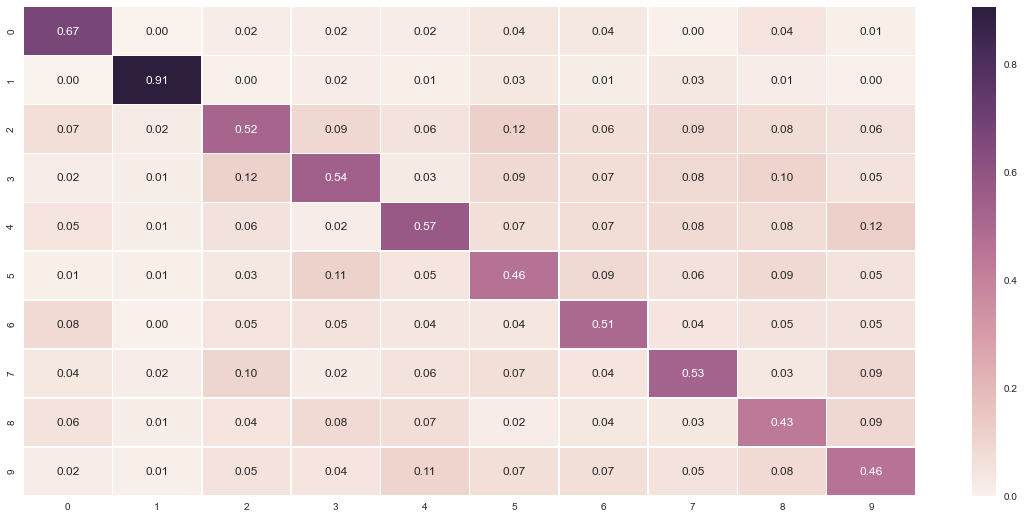

In [8]:
confusion_matrix_result = confusion_matrix(y_test , y_pred , normalize='pred')
df_cm = pd.DataFrame(confusion_matrix_result, index=range(10), columns=range(10))
plt.figure(figsize=(20, 9))
sns.heatmap(df_cm, annot=True, linewidths=0.5, fmt=".2f")